In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from code import inverse_problem as inv 
from code import direct_problem as direct 
from code import visualization_functions as visfunc

direct_problem was imported
inverse_problem was imported
visualization_functions were imported


In [2]:
rmin,rmax=0.1,2*10**3
r=np.logspace(np.log10(rmin),np.log10(rmax),25)
rho0,h0,rhoN=50,30,9
rho1,rho2,thickness,N=100,9,2,150
#param=[rho0,h0] + [rho1,thickness, rho2,thickness]*N +[rhoN]

param=[rho1,thickness, rho2,thickness]*N+[rhoN]
method='U'

resistance=[]
for r_i in r:
    resistance.append(direct.calculate_apparent_resistance(param,method,r_i,10*int(1+r_i/200))) 

In [3]:
start=[rho1,thickness] + [(rho1*rho2)**0.5, 2*N*thickness] + [rhoN]
bound=[(0.1,2*rho1), (0.1,2*h0)] + [(1/(N/rho1+N/rho2),N*(rho1+rho2)), (0.1,1000)] + [(0.1,2*rhoN)]

In [4]:
bound


[(0.1, 200), (0.1, 60), (0.055045871559633024, 16350), (0.1, 1000), (0.1, 18)]

4.454667594764268 Ом
13.881040237229819 %


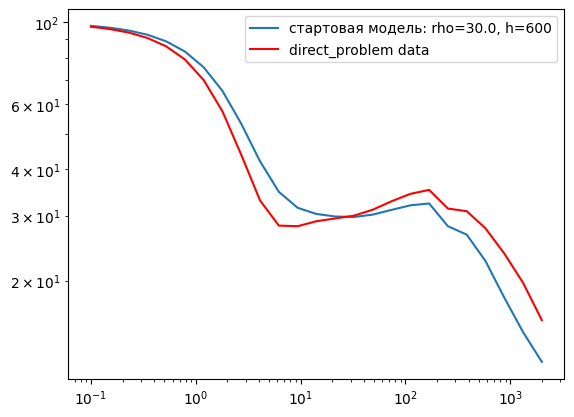

In [5]:
rk_start=[]
for r_i in r:
    rk_start.append(direct.calculate_apparent_resistance(start,method,r_i,num_of_zeros=10*int(1+r_i/200)))
rk_start=np.array(rk_start)
plt.loglog(r,rk_start, label=f'стартовая модель: rho={start[2]}, h={start[3]}')
plt.loglog(r,resistance,c='red', label='direct_problem data')
plt.legend()
print(inv.RMSE(rk_start,resistance),'Ом')
print(inv.RMSPE(rk_start,resistance),'%')

In [6]:
loss='RMSPE'
minim='L-BFGS-B'
results=inv.inverse_problem_solver(method, np.array([r,resistance]).T, minimization_method=minim, loss_type=loss, start=start,boundaries=bound) 

In [7]:
#Вывод количества слоёв в модели, её параметров и полученной ошибки
t=''
if loss=="RMSPE": t='%'
if loss=="RMSE": t='Ом'
print('\nnumber of layers= ', int((len(results.x)+1)/2), '\nparam =', results.x, f'\nloss {loss} =', results.fun,t)


number of layers=  3 
param = [104.10897058   1.36405657  29.0433627  600.24712238  13.52681361] 
loss RMSPE = 4.25509855948846 %


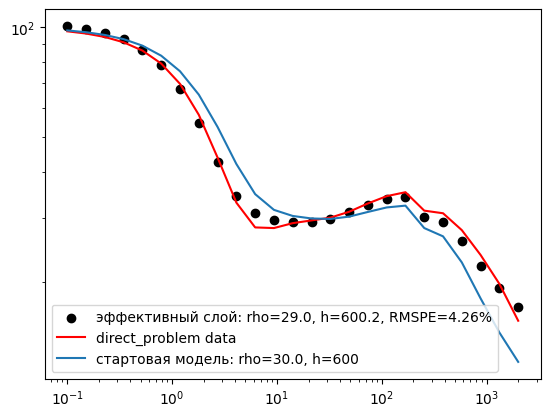

In [8]:
# Визуализация

rk=[]
for r_i in r:
    rk.append(direct.calculate_apparent_resistance(results.x,method,r_i,num_of_zeros=10*int(1+r_i/200)))
rk=np.array(rk)

plt.scatter(r,rk, c='black',label=f'эффективный слой: rho={round(results.x[2],1)}, h={round(results.x[3],1)}, {loss}={round(results.fun,2)}{t}')

plt.loglog(r,resistance,c='red', label='direct_problem data')
plt.loglog(r,rk_start, label=f'стартовая модель: rho={start[2]}, h={start[3]}')
plt.legend()

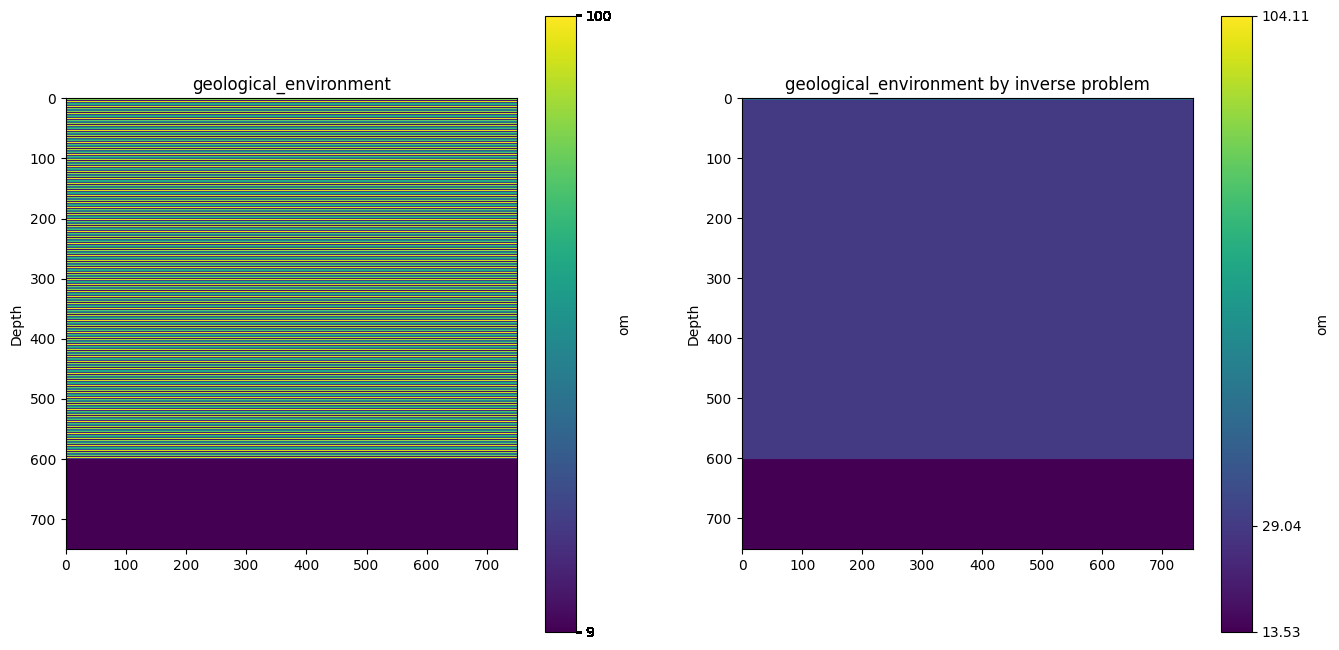

In [9]:
fig=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(visfunc.geological_environment(param))
plt.ylabel('Depth')
plt.title('geological_environment')
plt.colorbar(label='om',  ticks=param[0::2])
plt.subplot(1,2,2)
plt.imshow(visfunc.geological_environment(list(results.x)))
plt.ylabel('Depth')
plt.title('geological_environment by inverse problem')
plt.colorbar(label='om',  ticks=results.x[0::2])